# Seaborn
Seaborn is a powerful Python data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn simplifies the process of creating complex visualizations by providing built-in themes, color palettes, and functions for common statistical plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Lineplot

<Axes: xlabel='study_hours', ylabel='test_score'>

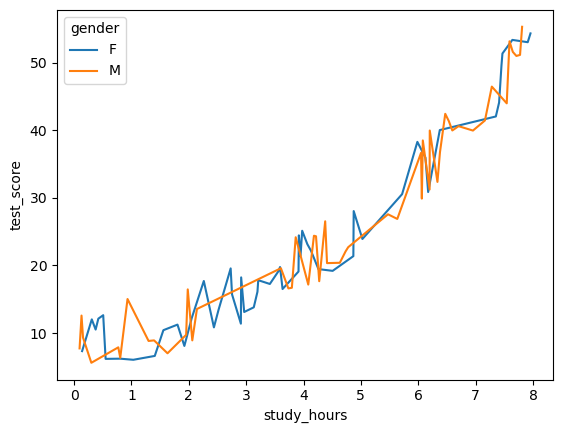

In [3]:
student_data = pd.read_csv('student_dataset_complete.csv')

# Axes Level: Single graph
sns.lineplot(data=student_data, x='study_hours', y='test_score', errorbar='sd', hue='gender')         # errorbar='sd' adds standard deviation error bars, hue differentiates lines

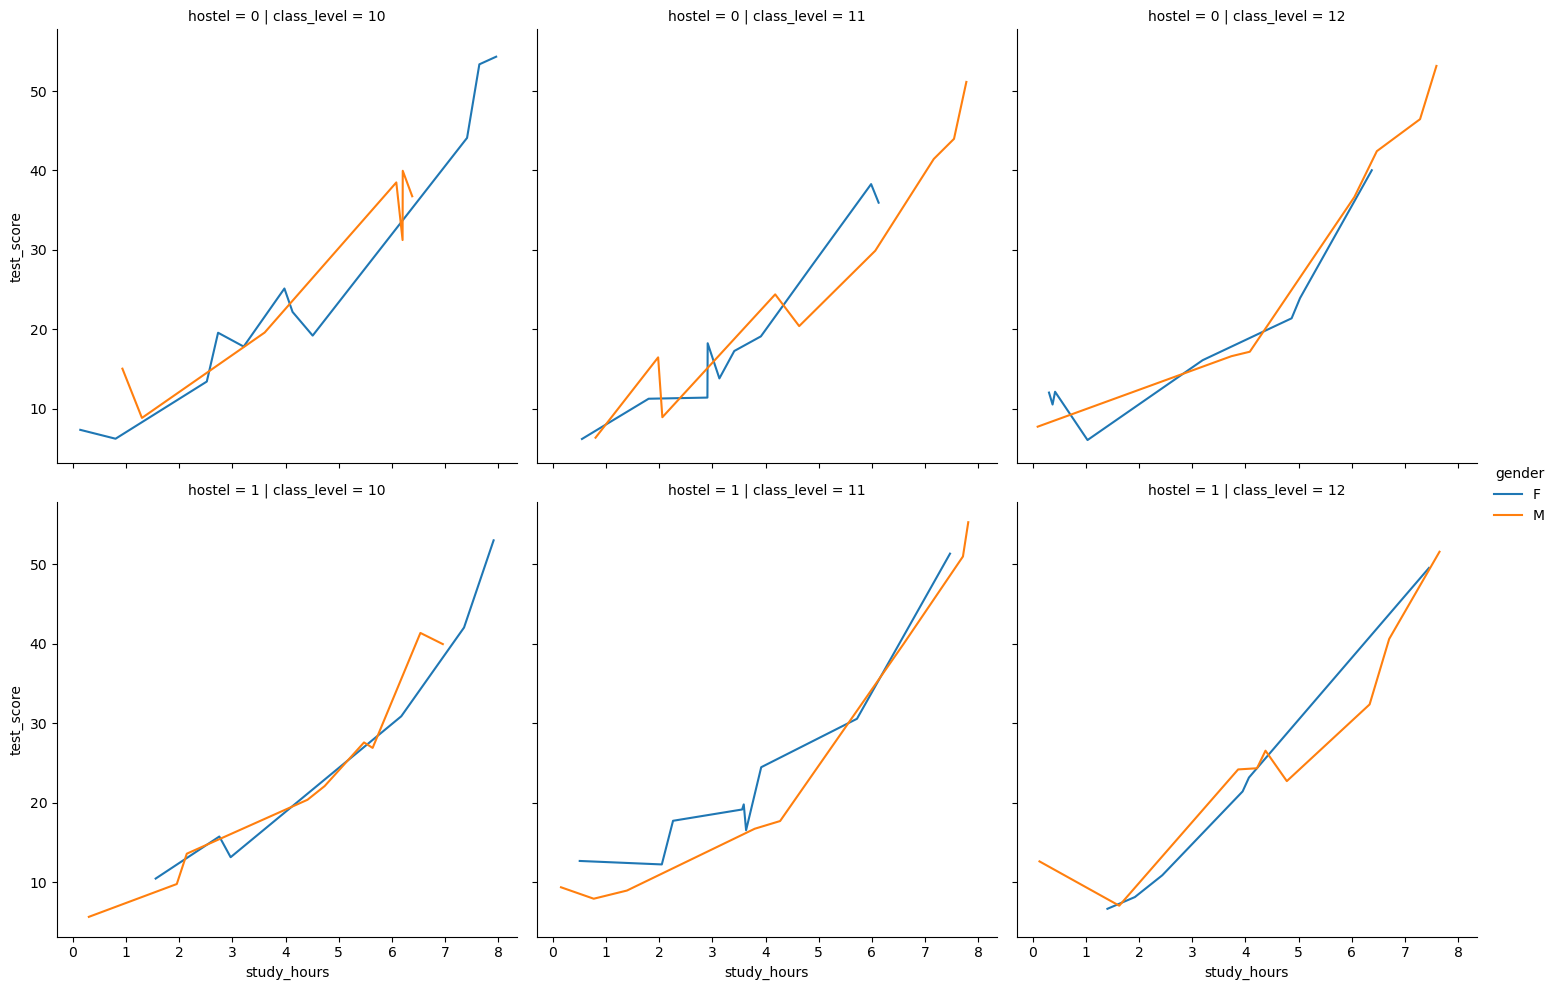

In [ ]:
# Figure Level: Multiple graphs
# This type of plot called facet plot where we can create multiple subplots based on the categories of one or more variables.
g = sns.relplot(data=student_data, x='study_hours', y='test_score', kind='line', col='class_level', row='hostel', hue='gender', errorbar=None)

# In facet plot, 
#  - 'col' parameter is used to create separate plots for each category of 'class_level'.
#  - 'row' parameter can also be used to create separate plots in rows based on another categorical variable.
#  - 'hue' parameter can be used within each subplot to differentiate lines by another categorical variable, such as 'gender'.
#  - 'wrap' parameter can be used to limit the number of columns in the facet grid.
# That means by col and row we are creating multiple plots based on categories, and within each plot hue is used to differentiate lines.

## Scatter Plot

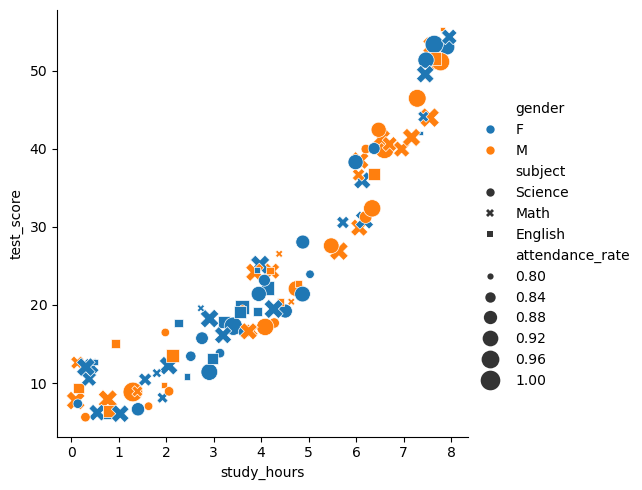

In [13]:
sns.relplot(kind="scatter", data=student_data, x='study_hours', y='test_score', hue='gender', style='subject', size='attendance_rate', sizes=(20, 200))

# hue: different colors for different categories
# style: different markers for different categories
# size: size of the markers based on a numerical variable 
# sizes: tuple indicating the minimum and maximum size of the markers

In [ ]:
# Different sns datasets
# tips = sns.load_dataset('tips')
# iris = sns.load_dataset('iris')
# penguins = sns.load_dataset('penguins')
# diamonds = sns.load_dataset('diamonds')
# flights = sns.load_dataset('flights')
# titanic = sns.load_dataset('titanic')
# mpg = sns.load_dataset('mpg')
# exercise = sns.load_dataset('exercise')
# fmri = sns.load_dataset('fmri')
# planets = sns.load_dataset('planets')

In [16]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


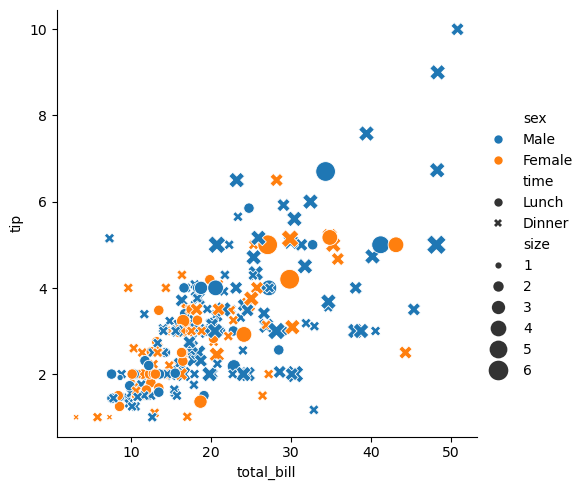

In [17]:
sns.relplot(kind="scatter", data=tips, x='total_bill', y='tip', hue='sex', style='time', size='size', sizes=(20, 200))

## Histogrram

<Axes: xlabel='attendance_rate', ylabel='Count'>

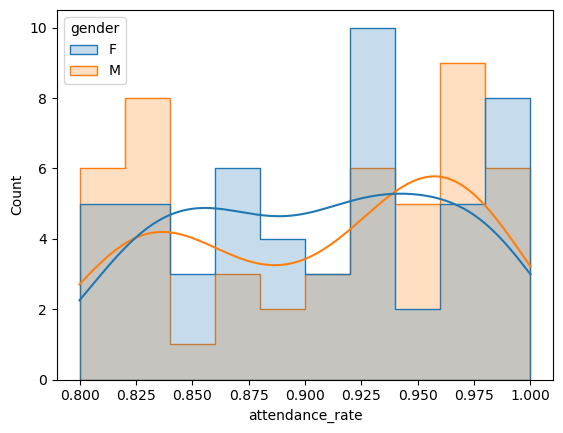

In [23]:
# Axes Level: Single graph

sns.histplot(data=student_data, x='attendance_rate', hue='gender', bins=10, kde=True, color='blue')     #kde adds Kernel Density Estimation curve

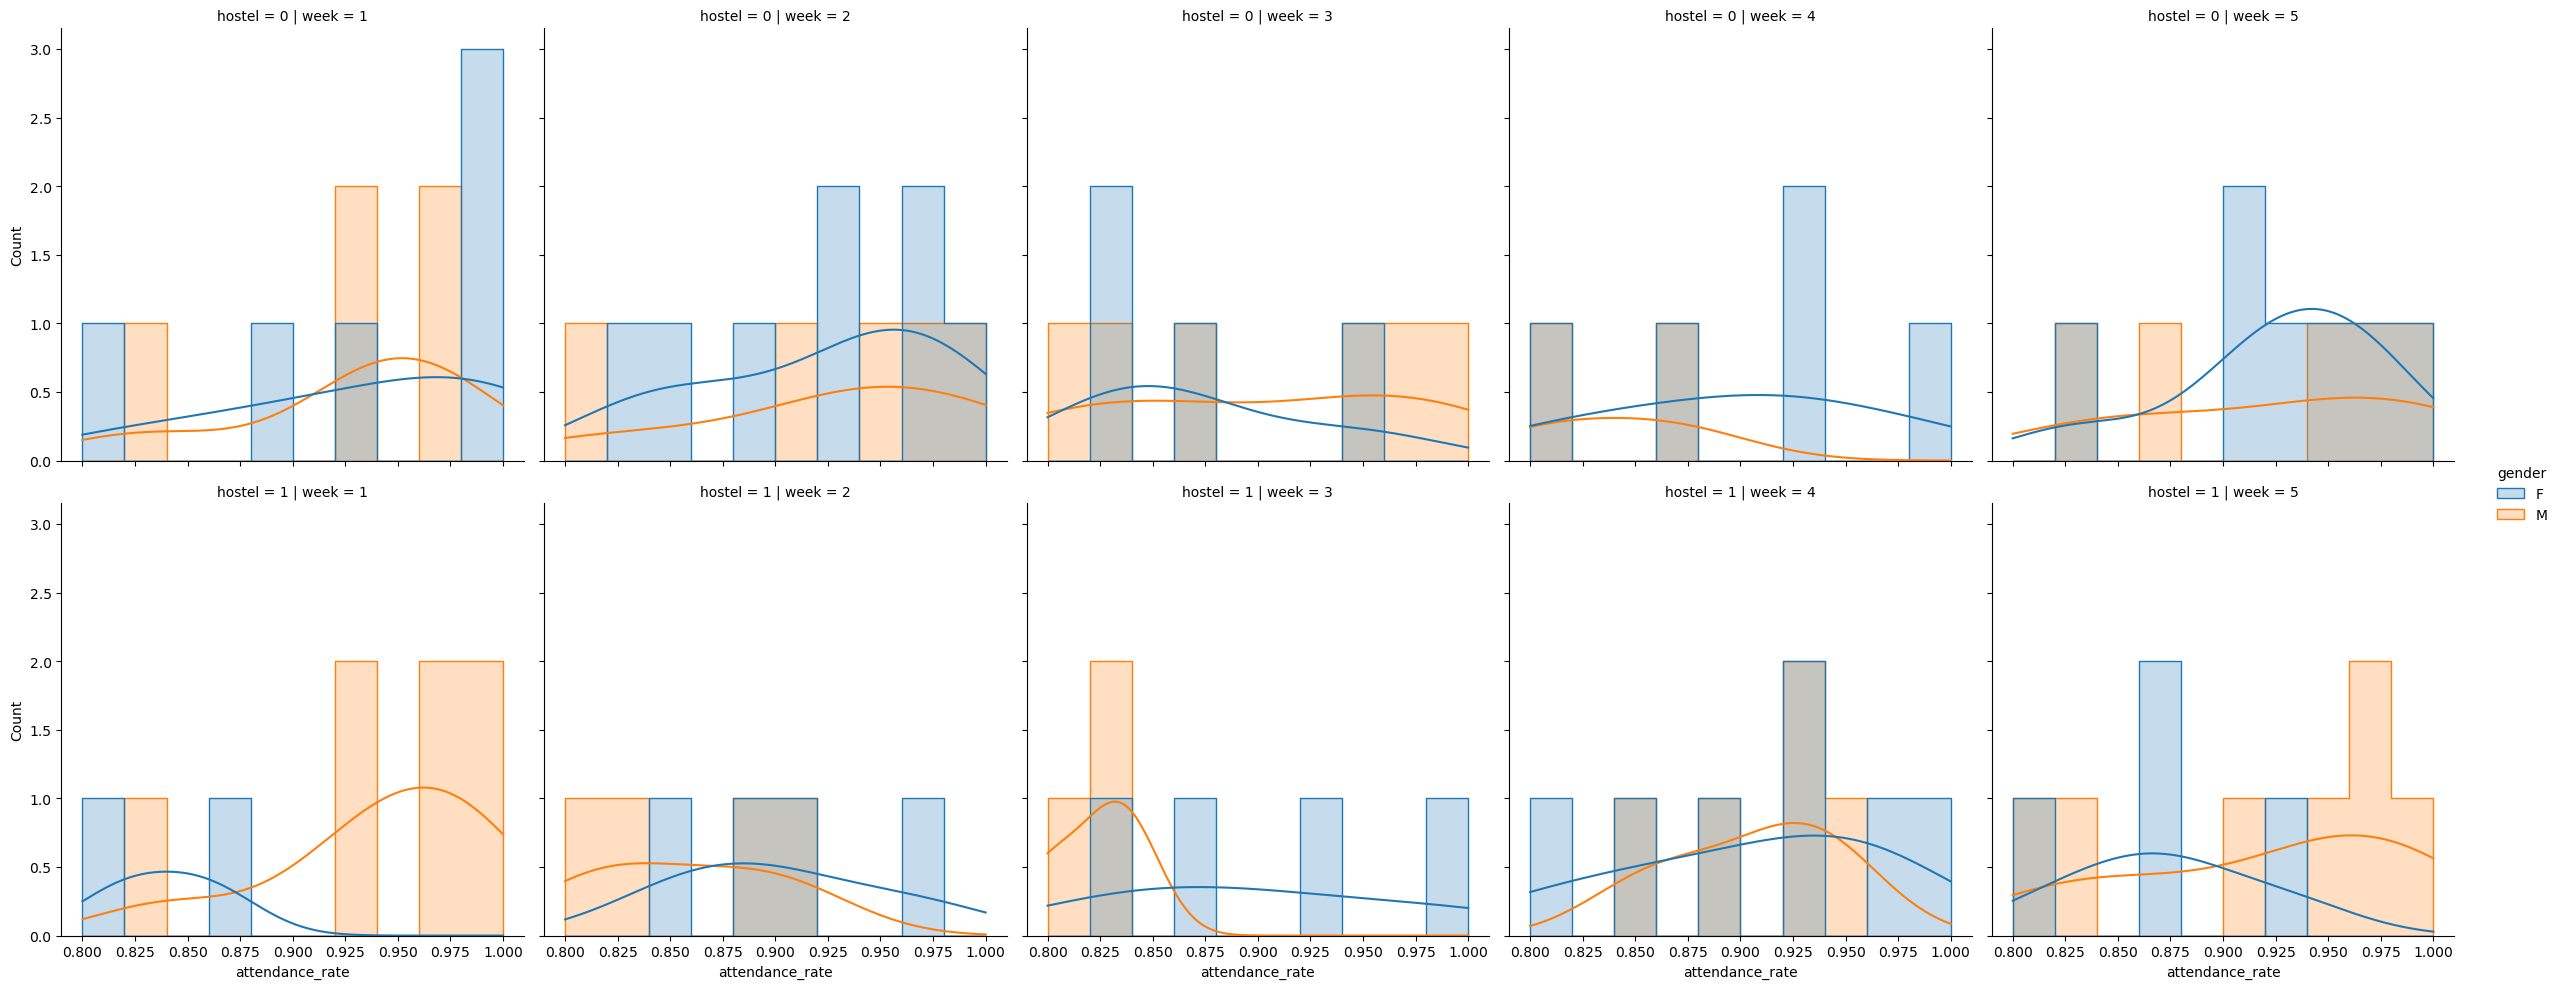

In [31]:
# Figure Level: Multiple graphs

sns.displot(kind='hist', data=student_data, x='attendance_rate', hue='gender', bins=10, kde=True, color='blue', element='step', col='week', row='hostel')

## KDE(Kernel Density Estimation) Plot

<Axes: xlabel='total_bill', ylabel='Density'>

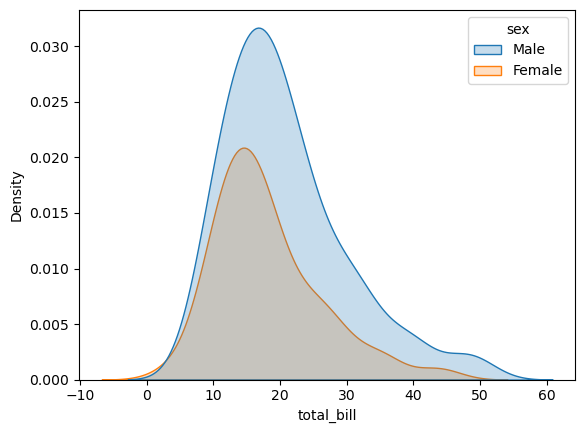

In [32]:
# KDE plot helps to visualize the distribution of a continuous variable by estimating its probability density function (PDF).

sns.kdeplot(data=tips, x='total_bill', hue='sex', fill=True)

## Count Plot & Bar Plot

<Axes: xlabel='subject', ylabel='count'>

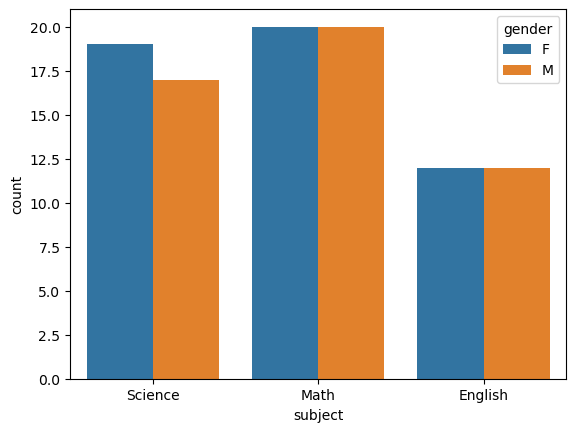

In [35]:
# Count Plot: Is used to show the counts of observations in each categorical bin using bars.

sns.countplot(data=student_data, x='subject', hue='gender')

<Axes: xlabel='subject', ylabel='attendance_rate'>

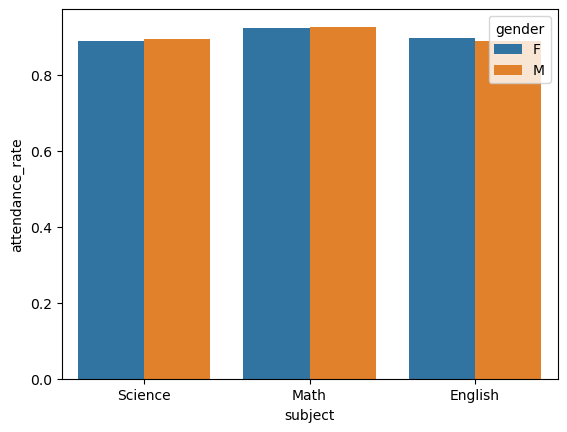

In [37]:
# Bar Plot: Used to represent categorical data with rectangular bars with heights or lengths proportional to the values they represent.

sns.barplot(data=student_data, x='subject', y='attendance_rate', hue='gender', estimator=np.mean, errorbar=None)       #If errorbar=None, no error bars are shown otherwise by default it shows 95% confidence interval error bars, estimator is used to compute the value for each bar (mean by default).

## Regression Plot

<Axes: xlabel='study_hours', ylabel='test_score'>

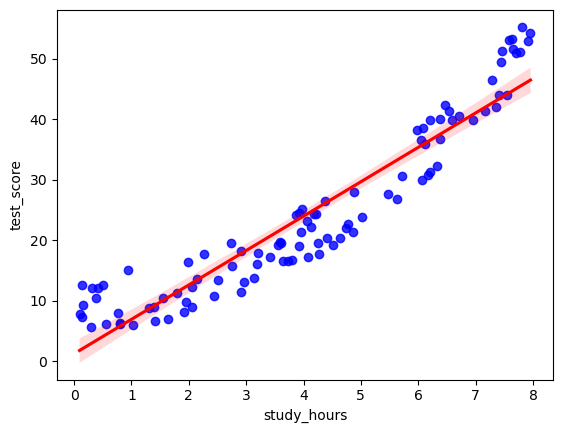

In [38]:
# Regression plot is used to visualize the relationship between two continuous variables along with a fitted regression line. It makes a linear line that best fits the data points.
sns.regplot(data=student_data, x='study_hours', y='test_score', scatter_kws={'color':'blue'}, line_kws={'color':'red'})     #for axes level single graph

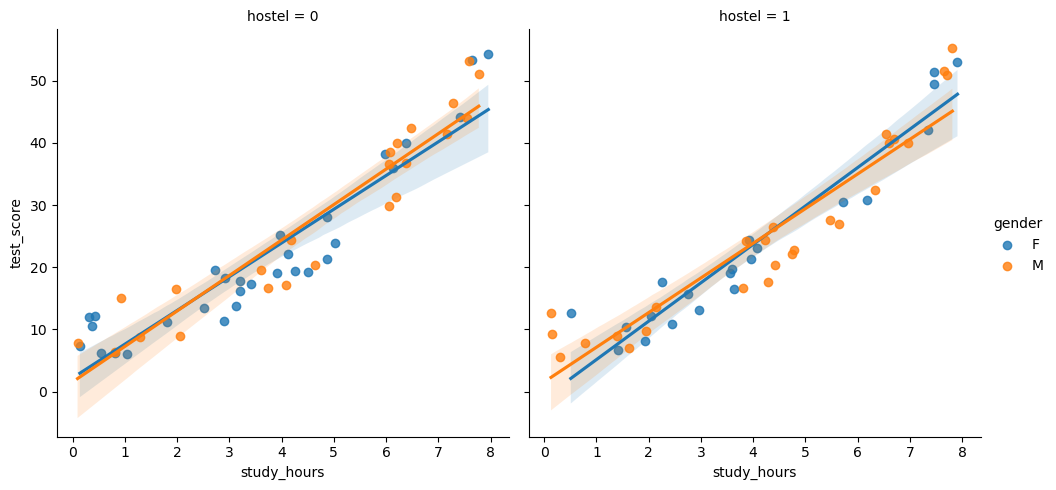

In [42]:
sns.lmplot(data=student_data, x='study_hours', y='test_score', hue='gender', col='hostel')    #for figure level multiple graphs

## Pair Plot & Joint Plot

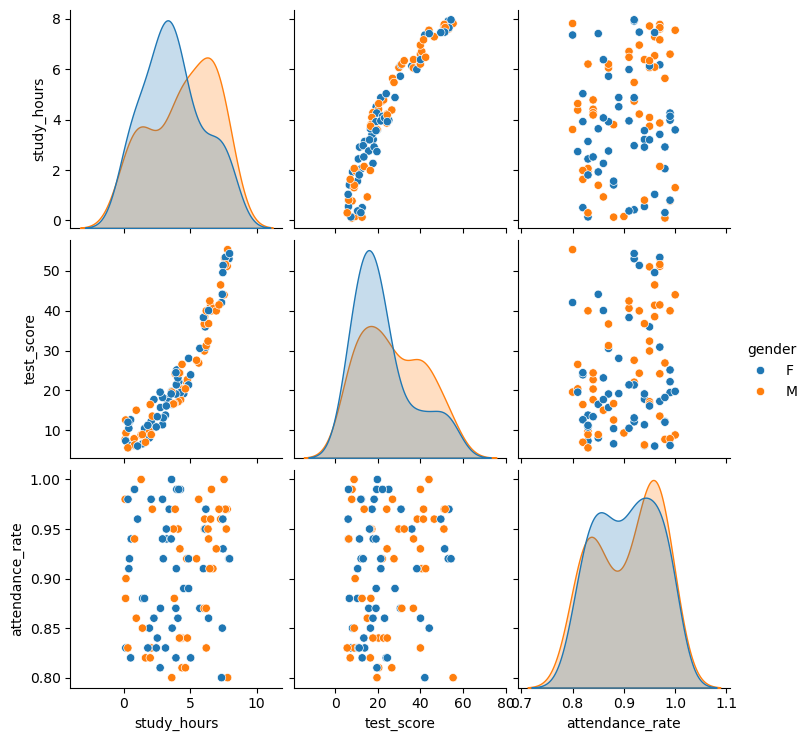

In [45]:
# Pair plot helps to visualize pairwise relationships in a dataset. It creates a matrix of scatter plots for each pair of numerical variables and histograms or KDE plots for the distribution of each variable along the diagonal.

sns.pairplot(data=student_data[['study_hours', 'test_score', 'attendance_rate','gender']], hue='gender', diag_kind='kde')
# - 'kde' option for diag_kind adds Kernel Density Estimation plots on the diagonal instead of histograms. Default is 'hist'.

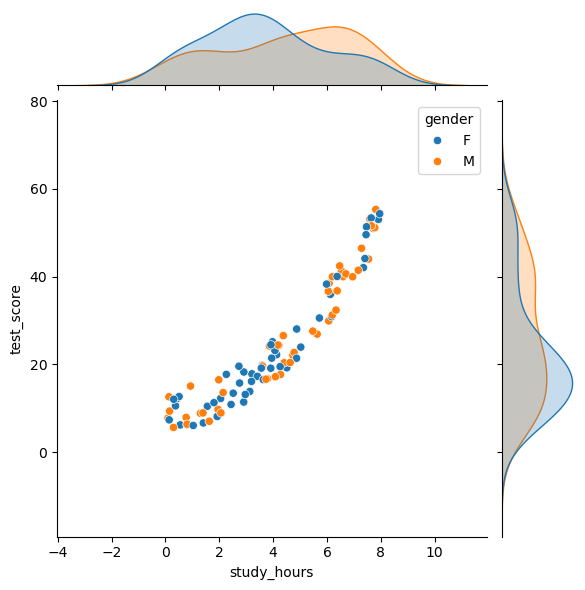

In [46]:
# Joint plot is used to visualize the relationship between two continuous variables along with their individual distributions.
sns.jointplot(data=student_data, x='study_hours', y='test_score', hue='gender', kind='scatter')

# Plotly
Plotly is an open-source graphing library that enables the creation of interactive, web-based visualizations. It supports a wide range of chart types, including line plots, scatter plots, bar charts, histograms, pie charts, and more. Plotly is particularly well-suited for creating dashboards and data exploration tools due to its **interactivity** features.

## Scatter Plot

In [50]:
fig = px.scatter(student_data, x='study_hours', y='test_score', color='gender', size='attendance_rate', hover_data=['subject', 'class_level', 'hostel'], title='Study Hours vs Test Score')
fig.show()

## Line Plot

In [56]:
enrollment_data = pd.read_csv('enrollment_data.csv')

fig = px.line(enrollment_data, x='Year', y='Programming', title='Yearly Enrollments by Program', markers=True)
fig.show()

fig.write_html('enrollment_trends.html')        # saves the plot as an HTML file

## Histogram

In [58]:
fig = px.histogram(student_data, x='test_score', color='gender', nbins=30, title='Distribution of Test Scores by Gender')
fig.show()